In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.ndimage import gaussian_filter1d
%matplotlib inline

In [2]:
# 定义使用tanh的三层BP且输出维度为1网络，指定输入，隐藏量层的维度
class BP_3layers1out:
    # 初始化权重矩阵和偏置向量，指定学习率
    def __init__(self, num_inputs, num_hiddens, lr):
        self.W1 = np.random.randn(num_inputs, num_hiddens)
        self.b1 = np.random.randn(1, num_hiddens)
        self.W2 = np.random.randn(num_hiddens, 1)
        self.b2 = np.random.randn(1, 1)
        self.lr = lr
        self.num_inputs = num_inputs
        self.num_hiddens = num_hiddens
    
    # 定义激活函数
    def tanh(self, x):
        return np.tanh(x)
    
    def dtanh(self, x):
        return 1 - x**2
        
    # 定义损失函数SE
    def loss_MSE(self, y_hat, y):
        return 0.5 * np.sum((y_hat - y) ** 2) / len(y)
    
    # 前向传播
    # x为一个数据向量
    def forward(self, x):
        # 先计算隐藏层
        h = self.tanh(x @ self.W1 + self.b1)
        # 返回隐藏层变量和输出
        return h @ self.W2 + self.b2, h
        
    # 具体推导过程见笔记链接
    # 反向传播更新
    def bp(self, y_hat, y, h, x):
        # 标量
        dLdy = y_hat - y
        # 标量对标量求导还是标量
        dLdb2 = dLdy
        # 标量对向量求导
        # 等价于标量对向量中的每个元素求导，需要转置
        dLdW2 = dLdb2 * h.T
        # 标量对向量求导
        dLdb1 = dLdy * self.W2.T * self.dtanh(h)
        # 标量对矩阵求导
        dLdW1 = x.T @ dLdb1

        # 更新
        return dLdb2, dLdW2, dLdb1, dLdW1
        
    
    # 对有限的数据不断利用更新参数
    # 增加一个批量大小，用于小批量梯度下降
    def train(self, inputs, outputs, epochs=5000, batch_size=1):
        loss =[]
        for i in range(epochs):
            index = np.random.choice(range(len(inputs)), size=batch_size)

            dLdb2_ = 0
            dLdW2_ = np.zeros((self.num_hiddens, 1))
            dLdb1_ = np.zeros((1, self.num_hiddens))
            dLdW1_ = np.zeros((self. num_inputs, self.num_hiddens))
            for (x, y) in zip(inputs[index], outputs[index]):
                # ndarry默认没有维度，需要通过reshape调整
                x = x.reshape(1, -1)
                y_hat, h = self.forward(x)
                dLdb2, dLdW2, dLdb1, dLdW1 = self.bp(y_hat, y, h, x)
                dLdb2_ += dLdb2
                dLdW2_ += dLdW2
                dLdb1_ += dLdb1
                dLdW1_ += dLdW1
            
            self.b2 -= self.lr * dLdb2 / batch_size
            self.W2 -= self.lr * dLdW2 / batch_size
            self.b1 -= self.lr * dLdb1 / batch_size
            self.W1 -= self.lr * dLdW1 / batch_size
            
            if i % 100 == 0:
                loss.append(self.loss_MSE(self.predict(inputs), outputs))
        return loss
    
    def predict(self, inputs):
        outputs = np.zeros(len(inputs))
        for i in range(len(inputs)):
            y_hat,_ = self.forward(inputs[i].reshape(1, -1))
            outputs[i] = y_hat
        return outputs

(-10.0, 10.0)

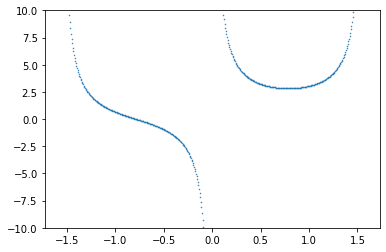

In [3]:
# 如果抽奇数，就会抽到0
np.seterr(divide='ignore', invalid='ignore')
# 通过在-pi/2到pi/2密集采样获得点
x = np.linspace(-math.pi/2, math.pi/2, 500)
y = 1/np.sin(x) + 1/np.cos(x)
for i in range(len(y)):
    if y[i] > 100:
        y[i] = 100
    if y[i] < -100:
        y[i] = -100

# 画图需要用scatter，不然在渐近线处会闭合
# 适当限制y轴的范围有利于观察曲线走向，通过s指定点的大小
plt.scatter(x, y, marker='.', s=1)
plt.ylim(-10, 10)

In [4]:
# 拟合y=1/sinx+1/cosx，输入为1个元素，隐藏层用30个神经元
func = BP_3layers1out(1, 50, 0.1)
loss = func.train(x, y, epochs= 200000, batch_size=80)

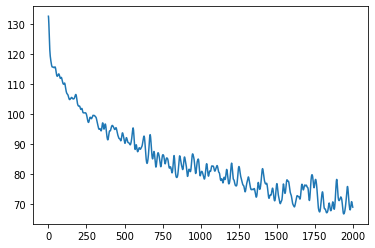

In [5]:
loss_smooth = gaussian_filter1d(loss, sigma=5)
plt.plot(range(len(loss)), loss_smooth)

(-10.0, 10.0)

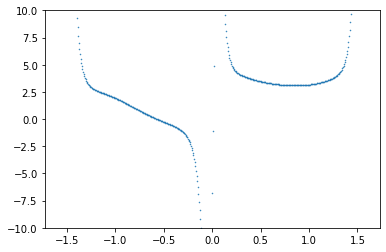

In [6]:
f = func.predict(x)
plt.scatter(x, f, marker='.', s=1)
plt.ylim(-10, 10)